In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
titanic_df = pd.read_csv("./titanic_train.csv", encoding="cp949")  # 해당 국가의 언어가 적혀있는 경우 encoding을 꼭 확인하자.

In [6]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [7]:
titanic_df.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace = True)
titanic_df['Cabin'].fillna('N',inplace = True)
titanic_df['Embarked'].fillna('N',inplace = True)

In [10]:
titanic_df.isnull().sum().sum()                  # .sum()을 한개만하면, 컬럼단위로.   두개하면 컬럼을 다묶어서 sum한 값을 보여준다.

0

In [11]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
titanic_df['Cabin'].value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [13]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [14]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[0]

In [15]:
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [16]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

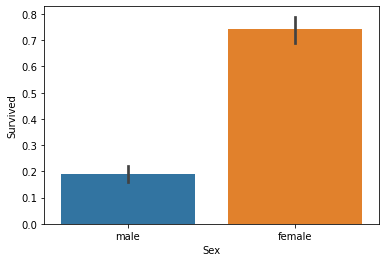

In [17]:
sns.barplot(x='Sex', y='Survived', data = titanic_df)   # 성별은 생존율에 영향을 미친다.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

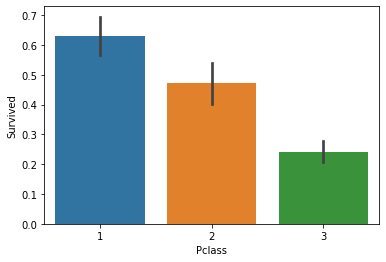

In [18]:
sns.barplot(x='Pclass', y='Survived', data = titanic_df) # 등급에 따른 생존율

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

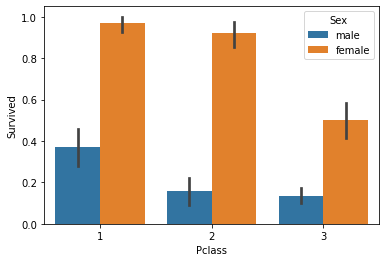

In [19]:
sns.barplot(x='Pclass', y='Survived', hue ='Sex', data = titanic_df) # 등급에 따른 생존율

In [20]:
titanic_df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [21]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

In [22]:
get_category(45)

'Adult'

In [23]:
group_name = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Yound Adult', 'Adult', 'Elderly']

In [24]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(
                            lambda x:get_category(x)
)

In [25]:
titanic_df['Age_cat']

0          Student
1            Adult
2      Young Adult
3      Young Adult
4      Young Adult
          ...     
886    Young Adult
887        Student
888    Young Adult
889    Young Adult
890    Young Adult
Name: Age_cat, Length: 891, dtype: object

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

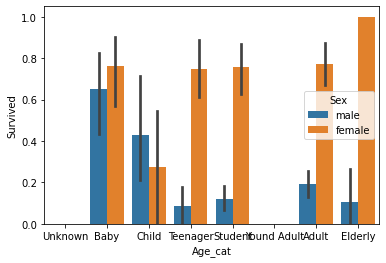

In [26]:
sns.barplot(x='Age_cat',
            y='Survived',
            hue = 'Sex',
            data = titanic_df,
            order = group_name)

In [27]:
titanic_df.head(1) # Name 같은건 보통 학습전에 지운다. ID도, = Uniq값들은 구분을 제외하면 의미가없음.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,N,S,Student


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        dataDF[feature] = le.fit_transform(dataDF[feature])
    return dataDF

In [30]:
encode_features(titanic_df).head(1)         # 앞의 메서드와 뒤의 메서드를 '.'으로 연결하는 것 = Method Chainning

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,7,3,Student


In [31]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace = True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace = True)
    return df

def drop_features(df):
    df.drop(columns = ['PassengerId', 'Name', 'Ticket'], inplace=True)
    return df

def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df['Cabin'] = df['Cabin'].str[0]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df

def transform_features(df):         # 만들어진 함수를 차례대로 실행하는 함수.
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [32]:
df = pd.read_csv("./titanic_train.csv", encoding="cp949")
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [33]:
fillna(df).head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,N,S


In [34]:
fillna(df).isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [35]:
drop_features(df).head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.25,N,S


In [36]:
format_features(df).head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,3
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,7,3


In [37]:
titanic_df = pd.read_csv('./titanic_train.csv')

In [38]:
y_titanic_df = titanic_df['Survived']

In [39]:
y_titanic_df.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [40]:
X_titanic_df = titanic_df.drop(columns=['Survived'])

In [41]:
X_titanic_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [42]:
X_titanic_df = transform_features(X_titanic_df)

In [43]:
X_titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,
                                                 y_titanic_df,
                                                 test_size = 0.2,
                                                 random_state = 11)

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [47]:
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression(solver= 'liblinear')

In [48]:
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print(f'DecisionTreeClassifier:{accuracy_score(y_test, dt_pred):.4f}')

DecisionTreeClassifier:0.7877


In [49]:
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(f'RandomForestClassifier:{accuracy_score(y_test, rf_pred):.4f}')

RandomForestClassifier:0.8547


In [50]:
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print(f'LogisticRegressoinClassifier:{accuracy_score(y_test, lr_pred):.4f}')

LogisticRegressoinClassifier:0.8659


In [51]:
from sklearn.model_selection import KFold          # 교차검증을하면? 조금 더 현실적인 값을 받을 수 있다.

In [52]:
def exec_kfold(clf, X, y, folds=5):
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import KFold
    import numpy as np
    kfold = KFold(n_splits = folds)
    scores = []               # 정확도를 넣어줄 리스트.
    for iter_count, (train_index,test_index) in enumerate(kfold.split(X)):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        scores.append(accuracy)
        print(f'교차검증{iter_count} 정확도 : {accuracy}')
    print(f'평균 정확도 : {np.mean(scores)}')

In [53]:
exec_kfold(dt_clf, X_titanic_df, y_titanic_df, folds=5)

교차검증0 정확도 : 0.7541899441340782
교차검증1 정확도 : 0.7808988764044944
교차검증2 정확도 : 0.7865168539325843
교차검증3 정확도 : 0.7696629213483146
교차검증4 정확도 : 0.8202247191011236
평균 정확도 : 0.782298662984119


In [54]:
exec_kfold(rf_clf, X_titanic_df, y_titanic_df, folds=5)

교차검증0 정확도 : 0.7932960893854749
교차검증1 정확도 : 0.8089887640449438
교차검증2 정확도 : 0.8370786516853933
교차검증3 정확도 : 0.7752808988764045
교차검증4 정확도 : 0.8595505617977528
평균 정확도 : 0.8148389931579938


In [55]:
exec_kfold(lr_clf, X_titanic_df, y_titanic_df, folds=5)

교차검증0 정확도 : 0.7932960893854749
교차검증1 정확도 : 0.7921348314606742
교차검증2 정확도 : 0.7752808988764045
교차검증3 정확도 : 0.7471910112359551
교차검증4 정확도 : 0.8426966292134831
평균 정확도 : 0.7901198920343984


In [56]:
from sklearn.model_selection import cross_val_score

In [59]:
scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
print(scores)
print(np.mean(scores))
# 교차검증0 정확도 : 0.7932960893854749
# 교차검증1 정확도 : 0.7808988764044944
# 교차검증2 정확도 : 0.7865168539325843
# 교차검증3 정확도 : 0.7696629213483146
# 교차검증4 정확도 : 0.8202247191011236
# 평균 정확도 : 0.782298662984119

[0.74301676 0.7752809  0.79213483 0.78651685 0.84269663]
0.7879291946519366


In [60]:
scores = cross_val_score(rf_clf, X_titanic_df, y_titanic_df, cv=5)
print(scores)
print(np.mean(scores))
# 교차검증0 정확도 : 0.7932960893854749
# 교차검증1 정확도 : 0.8089887640449438
# 교차검증2 정확도 : 0.8370786516853933
# 교차검증3 정확도 : 0.7752808988764045
# 교차검증4 정확도 : 0.8595505617977528
# 평균 정확도 : 0.8148389931579938

[0.79329609 0.79775281 0.84831461 0.76404494 0.86516854]
0.8137153976523758


In [61]:
scores = cross_val_score(lr_clf, X_titanic_df, y_titanic_df, cv=5)
print(scores)
print(np.mean(scores))
# 교차검증0 정확도 : 0.7932960893854749
# 교차검증1 정확도 : 0.7921348314606742
# 교차검증2 정확도 : 0.7752808988764045
# 교차검증3 정확도 : 0.7471910112359551
# 교차검증4 정확도 : 0.8426966292134831
# 평균 정확도 : 0.7901198920343984

[0.7877095  0.79213483 0.7752809  0.76404494 0.82022472]
0.7878789780930262


In [62]:
from sklearn.model_selection import GridSearchCV

In [79]:
param = {
     'max_depth' : [2,3,5,10],
     'min_samples_split':[2,3,5],
     'min_samples_leaf':[1,5,8]
}

In [80]:
GridSearchCV(dt_clf, param_grid=param, scoring='accuracy', cv=5)
grid_dt.fit(X_train, y_train)
print(f'최적의 파라메타 : {grid_dt.best_parmas_}')
print(f'최고 정확도 : {grid_dt.best_score_}')

NameError: name 'grid_dt' is not defined

In [81]:
pred = grid_dt.best_estimator_.predict(X_test)

NameError: name 'grid_dt' is not defined

In [82]:
accuracy_score(y_test,pred)

NameError: name 'pred' is not defined